In [134]:
import pandas as pd
import numpy as np

# statement 1

In [7]:
data=pd.read_csv("C:/Users/Aboli/Downloads/delivery_time (1).csv")

In [8]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:
import seaborn as sns

C:\Users\Aboli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

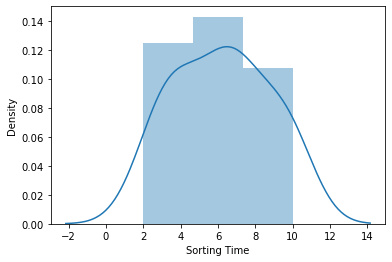

In [13]:
sns.distplot(data['Sorting Time'])

C:\Users\Aboli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

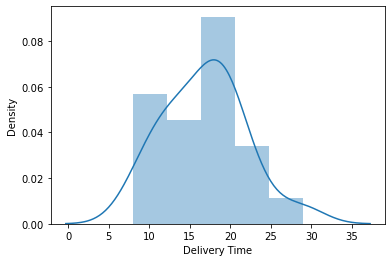

In [14]:
sns.distplot(data['Delivery Time'])
                 

In [15]:
data = data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
import statsmodels.formula.api as smf

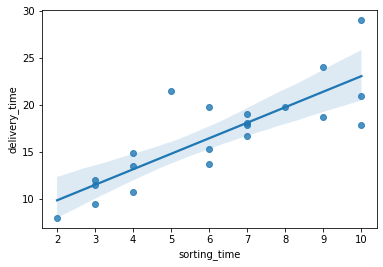

In [17]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'],data=data)
model=smf.ols("delivery_time ~ sorting_time",data=data).fit()
model

In [18]:
model

In [19]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [20]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [21]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [22]:
y=(6.582734) +(1.649020)*5

In [23]:
y

14.827834

In [24]:
newtime=pd.Series([5,8])

In [25]:
pred=pd.DataFrame(newtime,columns=['sorting_time'])

pred

,sorting_time
0,5
1,8


In [26]:
model.predict(pred)

0    14.827833
1    19.774893
dtype: float64

# Log transformation

In [27]:
x_log=np.log(data['sorting_time'])
y_log=np.log(data['delivery_time'])

In [28]:
model =smf.ols("y_log~ x_log",data = data).fit()

In [29]:
model

In [30]:
model.params

Intercept    1.741987
x_log        0.597522
dtype: float64

In [31]:
print(model.pvalues,'\n',model.tvalues)

Intercept    5.921137e-11
x_log        1.601539e-07
dtype: float64 
 Intercept    13.085552
x_log         8.024484
dtype: float64


In [32]:
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [33]:
y_log=(1.741987) + (0.597522)*5

In [34]:
y_log

4.729597

In [35]:
newtime=pd.Series([5,8])

In [36]:
pred=pd.DataFrame(newtime,columns=['x_log'])
pred

,x_log
0,5
1,8


In [37]:
model.predict(pred)

0    4.729599
1    6.522166
dtype: float64

In [38]:
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# improving model using squareroot tranformation

In [39]:
data.insert(len(data.columns),'a_sqrt',
           np.sqrt(data.iloc[:,0]))
data

,delivery_time,sorting_time,a_sqrt
0,21.00,10,4.582576
1,13.50,4,3.674235
2,19.75,6,4.444097
3,24.00,9,4.898979
4,29.00,10,5.385165
5,15.35,6,3.917908
6,19.00,7,4.358899
7,9.50,3,3.082207
8,17.90,10,4.230839
9,18.75,9,4.330127


In [40]:
model=smf.ols("delivery_time~a_sqrt",data = data).fit()

In [41]:
model

In [42]:
model.params

Intercept   -15.902667
a_sqrt        8.068752
dtype: float64

In [43]:
print(model.pvalues,'\n',model.tvalues)

Intercept    8.158463e-15
a_sqrt       9.829837e-21
dtype: float64 
 Intercept   -21.550902
a_sqrt       44.806348
dtype: float64


In [44]:
(model.rsquared,model.rsquared_adj)

(0.9906247323423885, 0.9901312972025141)

In [45]:
y_quad=(-3.930699)+(3.977225)*5

In [46]:
y_quad

15.955426

In [47]:
newtime=pd.Series([5,8])

In [48]:
pred=pd.DataFrame(newtime,columns=['a_sqrt'])
pred

,a_sqrt
0,5
1,8


# improving model with square transformation

In [49]:
data['Squar_del_time']=data.apply(lambda row:row.delivery_time**2,axis =1)
data

,delivery_time,sorting_time,a_sqrt,Squar_del_time
0,21.00,10,4.582576,441.0000
1,13.50,4,3.674235,182.2500
2,19.75,6,4.444097,390.0625
3,24.00,9,4.898979,576.0000
4,29.00,10,5.385165,841.0000
5,15.35,6,3.917908,235.6225
6,19.00,7,4.358899,361.0000
7,9.50,3,3.082207,90.2500
8,17.90,10,4.230839,320.4100
9,18.75,9,4.330127,351.5625


In [50]:
model=smf.ols('Squar_del_time~sorting_time',data=data).fit()

In [51]:
model

In [52]:
model.params

Intercept      -37.440078
sorting_time    55.553783
dtype: float64

In [53]:
print(model.pvalues,'\n',model.tvalues)

Intercept       0.593778
sorting_time    0.000035
dtype: float64 
 Intercept      -0.542504
sorting_time    5.368383
dtype: float64


In [54]:
(model.rsquared,model.rsquared_adj)

(0.6026728443618878, 0.5817608888019872)

# improving model with reciprocol transformation

In [55]:
reciprocal_del_time=1/data["delivery_time"]

In [75]:
reciprocal_del_time

0     0.047619
1     0.074074
2     0.050633
3     0.041667
4     0.034483
5     0.065147
6     0.052632
7     0.105263
8     0.055866
9     0.053333
10    0.050429
11    0.093023
12    0.059952
13    0.086957
14    0.083126
15    0.067204
16    0.072727
17    0.055218
18    0.125000
19    0.056085
20    0.046512
Name: delivery_time, dtype: float64

In [77]:
model=smf.ols('reciprocal_del_time~sorting_time',data=data).fit()

In [78]:
model

In [79]:
model.params

Intercept       0.110682
sorting_time   -0.007287
dtype: float64

In [80]:
print(model.pvalues,'\n',model.tvalues)

Intercept       9.669983e-12
sorting_time    4.059187e-06
dtype: float64 
 Intercept       14.525932
sorting_time    -6.378315
dtype: float64


In [81]:
(model.rsquared,model.rsquared_adj)

(0.6816508639250471, 0.6648956462368918)

# improving model using Box-cox transformation

In [85]:
from scipy.stats import boxcox
bcx_target, lam=boxcox(data["delivery_time"])

In [87]:
model=smf.ols('bcx_target~sorting_time',data=data).fit()

In [88]:
model.params

Intercept       3.714122
sorting_time    0.468564
dtype: float64

In [89]:
print(model.pvalues,'\n',model.tvalues)

Intercept       1.790789e-07
sorting_time    2.093830e-06
dtype: float64 
 Intercept       7.964349
sorting_time    6.700806
dtype: float64


In [90]:
(model.rsquared,model.rsquared_adj)

(0.7026641437912344, 0.6870148882012994)

# improving model using Yeo-Johnson Transformation

In [94]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(data["delivery_time"]) 

In [95]:
model=smf.ols('yf_target~sorting_time',data=data).fit()

In [96]:
model.params

Intercept       3.967570
sorting_time    0.424596
dtype: float64

In [97]:
print(model.pvalues,'\n',model.tvalues)

Intercept       1.440405e-08
sorting_time    2.095432e-06
dtype: float64 
 Intercept       9.388311
sorting_time    6.700429
dtype: float64


In [98]:
(model.rsquared,model.rsquared_adj)

(0.7026406506507266, 0.6869901585797122)

# The reciprocol transformation is best transformation for this model 

# Statement 2

In [ ]:
# salary=pd.read_csv("C:/Users/Aboli/Downloads/Salary_Data (1).csv")

In [58]:
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [59]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\Aboli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

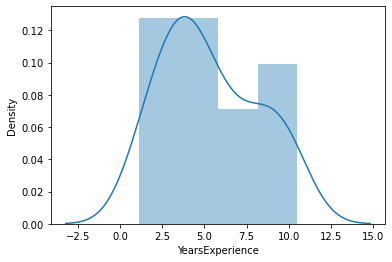

In [60]:
 sns.distplot(salary['YearsExperience'])

C:\Users\Aboli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

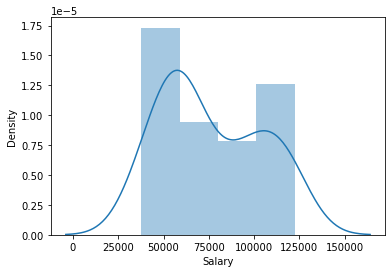

In [61]:
sns.distplot(salary['Salary'])

In [62]:
salary=salary.rename({'YearsExperience':'year', 'Salary':'income'},axis=1)

In [63]:
salary

,year,income
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:xlabel='year', ylabel='income'>

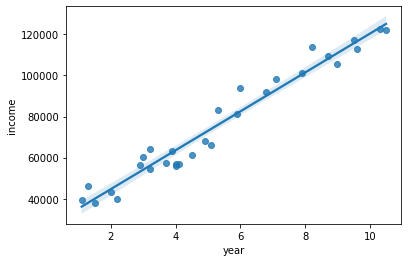

In [64]:
sns.regplot(x='year',y='income',data=salary)

In [65]:
model = smf.ols("income ~ year",data =salary).fit()

In [66]:
model

In [67]:
model

In [68]:
model.params

Intercept    25792.200199
year          9449.962321
dtype: float64

In [69]:
print(model.tvalues,'\n',model.pvalues)

Intercept    11.346940
year         24.950094
dtype: float64 
 Intercept    5.511950e-12
year         1.143068e-20
dtype: float64


In [70]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [71]:
newsalary=pd.Series([200,300])

In [72]:
data_pred=pd.DataFrame(newsalary,columns=['year'])

In [73]:
data_pred

,year
0,200
1,300


In [74]:
model.predict(data_pred)

0    1.915785e+06
1    2.860781e+06
dtype: float64

# improving model using logarithm

In [101]:
salary1=np.log(salary)

In [102]:
salary1

,year,income
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


<AxesSubplot:xlabel='year', ylabel='income'>

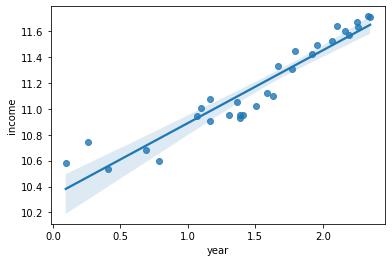

In [103]:
sns.regplot(x='year',y='income',data=salary1)

In [104]:
model =smf.ols("income ~ year",data=salary1).fit()

In [105]:
model

In [106]:
print(model.pvalues,'\n',model.tvalues)

Intercept    9.073132e-45
year         7.395278e-16
dtype: float64 
 Intercept    184.867959
year          16.352542
dtype: float64


In [107]:
(model.rsquared)

0.905215072581715

# Improving model using squarroot transformation

In [112]:
salary.insert(len(salary.columns), 'A_sqrt',
            np.sqrt(salary.iloc[:,0]))
salary

,year,income,A_sqrt
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240
5,2.9,56642.0,1.702939
6,3.0,60150.0,1.732051
7,3.2,54445.0,1.788854
8,3.2,64445.0,1.788854
9,3.7,57189.0,1.923538


In [113]:
model=smf.ols('income~A_sqrt',data=salary).fit()

In [114]:
model

In [115]:
model.params

Intercept   -16055.769117
A_sqrt       41500.680583
dtype: float64

In [116]:
print(model.tvalues,'\n' ,model.pvalues)

Intercept    -3.262308
A_sqrt       19.437148
dtype: float64 
 Intercept    2.906965e-03
A_sqrt       8.565358e-18
dtype: float64


In [117]:
(model.rsquared,model.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

# improving model with square transformation

In [118]:
salary['Squar_income']= salary.apply(lambda row: row.income**2,  axis=1)
salary

,year,income,A_sqrt,Squar_income
0,1.1,39343.0,1.048809,1.547872e+09
1,1.3,46205.0,1.140175,2.134902e+09
2,1.5,37731.0,1.224745,1.423628e+09
3,2.0,43525.0,1.414214,1.894426e+09
4,2.2,39891.0,1.483240,1.591292e+09
5,2.9,56642.0,1.702939,3.208316e+09
6,3.0,60150.0,1.732051,3.618022e+09
7,3.2,54445.0,1.788854,2.964258e+09
8,3.2,64445.0,1.788854,4.153158e+09
9,3.7,57189.0,1.923538,3.270582e+09


In [119]:
model=smf.ols('Squar_income~year',data=salary).fit()

In [120]:
model

In [121]:
model.params

Intercept   -1.609636e+09
year         1.526836e+09
dtype: float64

In [122]:
print(model.pvalues,'\n',model.tvalues)

Intercept    5.114661e-04
year         2.152535e-19
dtype: float64 
 Intercept    -3.926574
year         22.352727
dtype: float64


In [123]:
(model.rsquared,model.rsquared_adj)

(0.946933959304622, 0.9450387435655013)

# improving model using BOX-cox transformation

In [124]:
from scipy.stats import boxcox
bcx_target,lam =boxcox(salary["income"])

In [125]:
model=smf.ols('bcx_target~year',data=salary).fit()

In [126]:
model

In [127]:
print(model.pvalues,'\n',model.tvalues)

Intercept    7.255691e-45
year         3.477707e-18
dtype: float64 
 Intercept    186.350884
year          20.117718
dtype: float64


In [128]:
(model.rsquared,model.rsquared_adj)

(0.9352934131758686, 0.9329824636464353)

# improving model using Yeo-Johnson Transformation

In [129]:
from scipy.stats import yeojohnson
yf_target, lam = yeojohnson(salary["income"]) 

In [130]:
model=smf.ols('yf_target~year',data=salary).fit()

In [131]:
model.params

Intercept    15.751205
year          0.283321
dtype: float64

In [132]:
print(model.pvalues,'\n',model.tvalues)

Intercept    7.240897e-45
year         3.477604e-18
dtype: float64 
 Intercept    186.364479
year          20.117740
dtype: float64


In [133]:
(model.rsquared,model.rsquared_adj)

(0.935293549568351, 0.9329826049100778)